In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

In [8]:
# Download stopwords resource
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = text.replace('[^\w\s]', '')  # Remove punctuation
    tokens = text.split()  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Function to predict label for input text
def predict_label(input_text, tfidf_vectorizer, model):
    preprocessed_text = preprocess_text(input_text)
    text_tfidf = tfidf_vectorizer.transform([preprocessed_text])
    label = model.predict(text_tfidf)[0]
    return "Fake News" if label == 1 else "True News"

# Load dataset
file_path = "fakenews.csv"
data = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to /home/carlos-
[nltk_data]     arch-v2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/carlos-
[nltk_data]     arch-v2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Load dataset
file_path = "fakenews.csv"
data = pd.read_csv(file_path)

# Preprocess text
data['claim'] = data['claim'].apply(preprocess_text)

Test Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.84      0.75        25
        True       0.64      0.41      0.50        17

    accuracy                           0.67        42
   macro avg       0.66      0.63      0.62        42
weighted avg       0.66      0.67      0.65        42



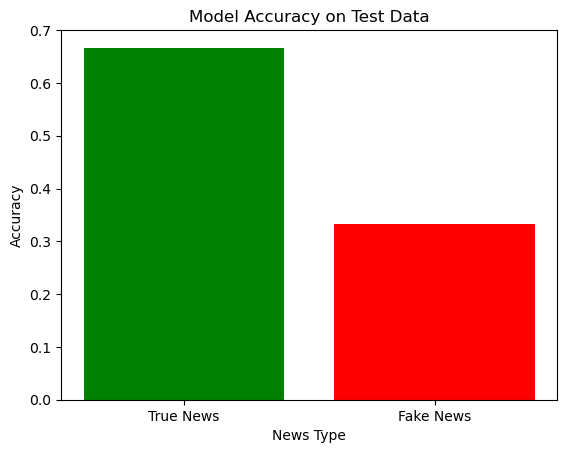

In [10]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['claim'], data['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualize results (optional)
labels = ['True News', 'Fake News']
accuracy_values = [accuracy_score(y_test, predictions), 1 - accuracy_score(y_test, predictions)]
plt.bar(labels, accuracy_values, color=['green', 'red'])
plt.xlabel('News Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Test Data')
plt.show()

In [13]:
# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Evaluate model on test data
predictions = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Cross-Validation Scores: [0.63636364 0.63636364 0.63636364 0.57575758 0.66666667]
Mean CV Accuracy: 0.6303030303030303
Test Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.84      0.75        25
        True       0.64      0.41      0.50        17

    accuracy                           0.67        42
   macro avg       0.66      0.63      0.62        42
weighted avg       0.66      0.67      0.65        42



In [14]:
# Testing with input text
input_text = "This is a news article text that you want to classify."
predicted_label = predict_label(input_text, tfidf_vectorizer, rf_classifier)
print(f"Predicted Label: {predicted_label}")

Predicted Label: True News
